In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/my_movies.csv')
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


# EDA

In [3]:
data.shape

(10, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

In [6]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [7]:
# Get list of categorical variables
catagory = (data.dtypes == 'object')
object_cols = list(catagory[catagory].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['V1', 'V2', 'V3', 'V4', 'V5']


In [8]:
data_new = data.iloc[:,5:]
data_new

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


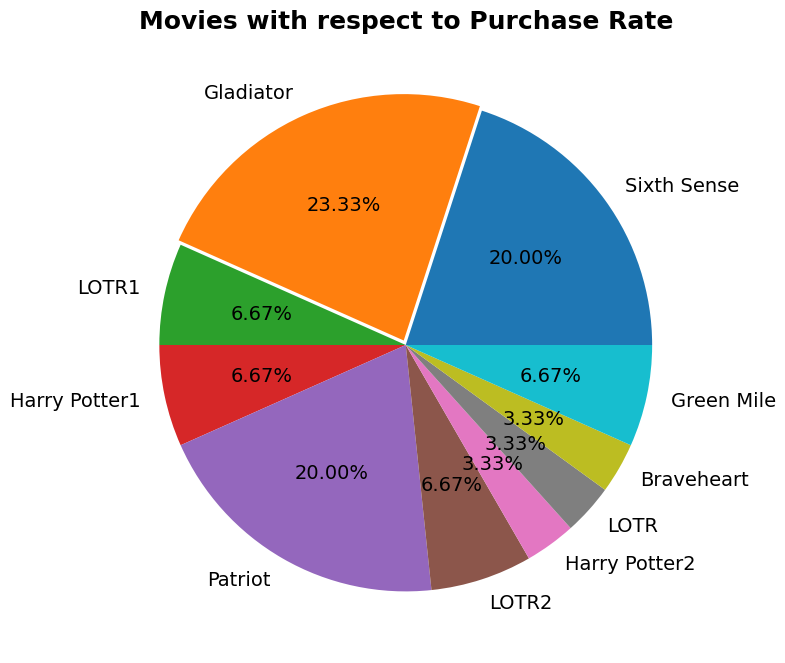

In [9]:
plt.figure(figsize = (8,8))
plt.pie(data_new.sum(), labels= data_new.columns,
       explode = [0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', textprops = {'size':14})

plt.title("Movies with respect to Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

In [10]:
count = data_new.loc[:,:].sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [11]:
count.sort_values(axis=0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


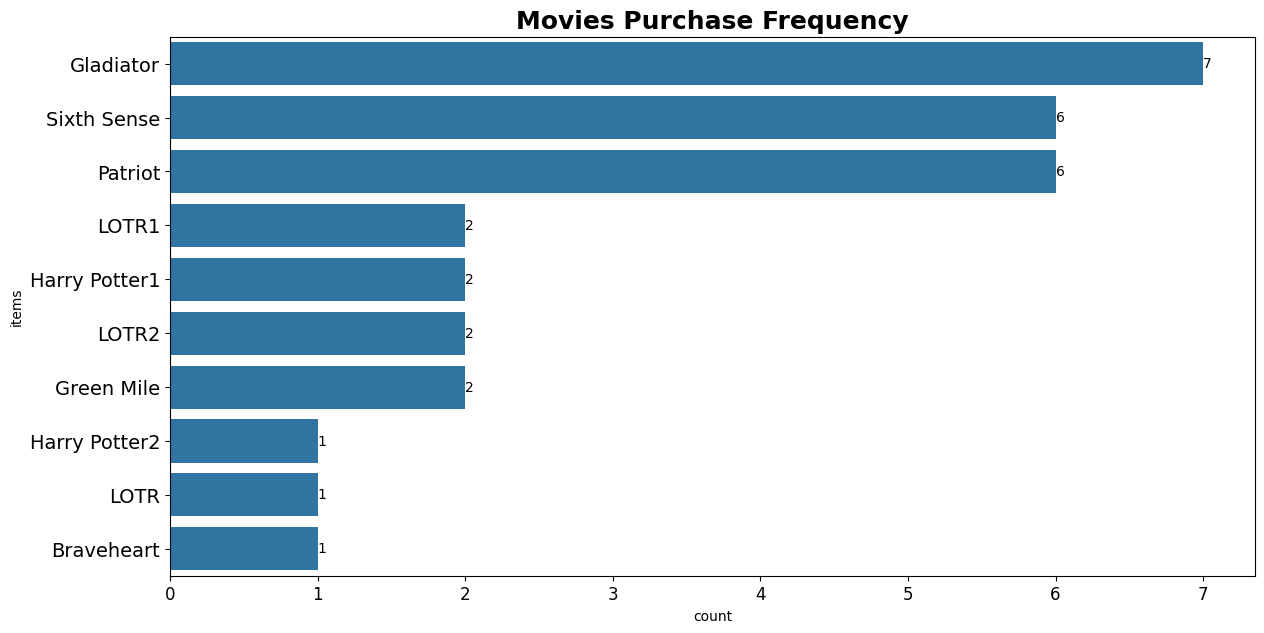

In [12]:
plt.figure(figsize = (14,7))
ax = sns.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Movies Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

# Apriori Algorithm

### 1. Association rules with 5% Support and 80% confidence

In [13]:
# With 5% Support
frequent_itemsets1=apriori(data_new,min_support=0.05,use_colnames=True,verbose=1)
frequent_itemsets1.head()

Processing 10 combinations | Sampling itemset size 5


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [14]:
print(len(frequent_itemsets1))

53


In [15]:
frequent_itemsets1.sort_values("support", ascending = False).head()

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Gladiator, Patriot)"
10,0.5,"(Sixth Sense, Gladiator)"


In [16]:
# with 80% confidence
rules1=association_rules(frequent_itemsets1,metric='lift',min_threshold=0.8)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000


In [17]:
rules1[(rules1.support > 0.05) & (rules1.confidence > 0.8)].sort_values("confidence", ascending = False).shape

(127, 10)

In [18]:
rules1.sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
209,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
103,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
134,"(Sixth Sense, Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
165,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
208,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


In [19]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift1 = rules1[rules1.lift>1]
lift1.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


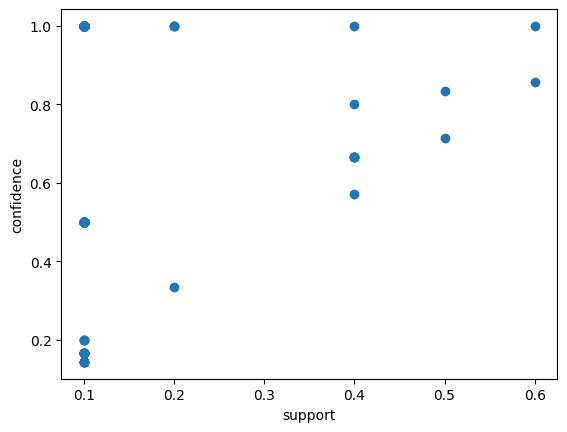

In [20]:
# visualization of obtained rule
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [21]:
matrix1 = lift1.pivot('antecedents','consequents','lift')
matrix1.head()

consequents,(Gladiator),"(Green Mile, LOTR)","(Gladiator, Braveheart)","(Braveheart, Patriot)","(LOTR2, LOTR1)","(Sixth Sense, LOTR, Gladiator)","(Sixth Sense, Green Mile, Gladiator)",(Harry Potter1),"(LOTR, Green Mile, Gladiator)","(LOTR, Sixth Sense, Green Mile)",...,"(LOTR, Gladiator)","(Sixth Sense, LOTR)","(Green Mile, Gladiator)","(Sixth Sense, LOTR1)","(Harry Potter1, LOTR1)","(Harry Potter1, Sixth Sense)","(LOTR2, Sixth Sense)","(Green Mile, LOTR1)","(Gladiator, Patriot)","(Harry Potter1, LOTR2, Sixth Sense, Green Mile)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),1.190476,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,...,1.666667,NaN,1.666667,NaN,1.666667,NaN,NaN,1.666667,1.111111,NaN
"(LOTR2, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,10.0,10.000000,10.0,NaN,NaN,NaN,NaN
"(Green Mile, LOTR)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


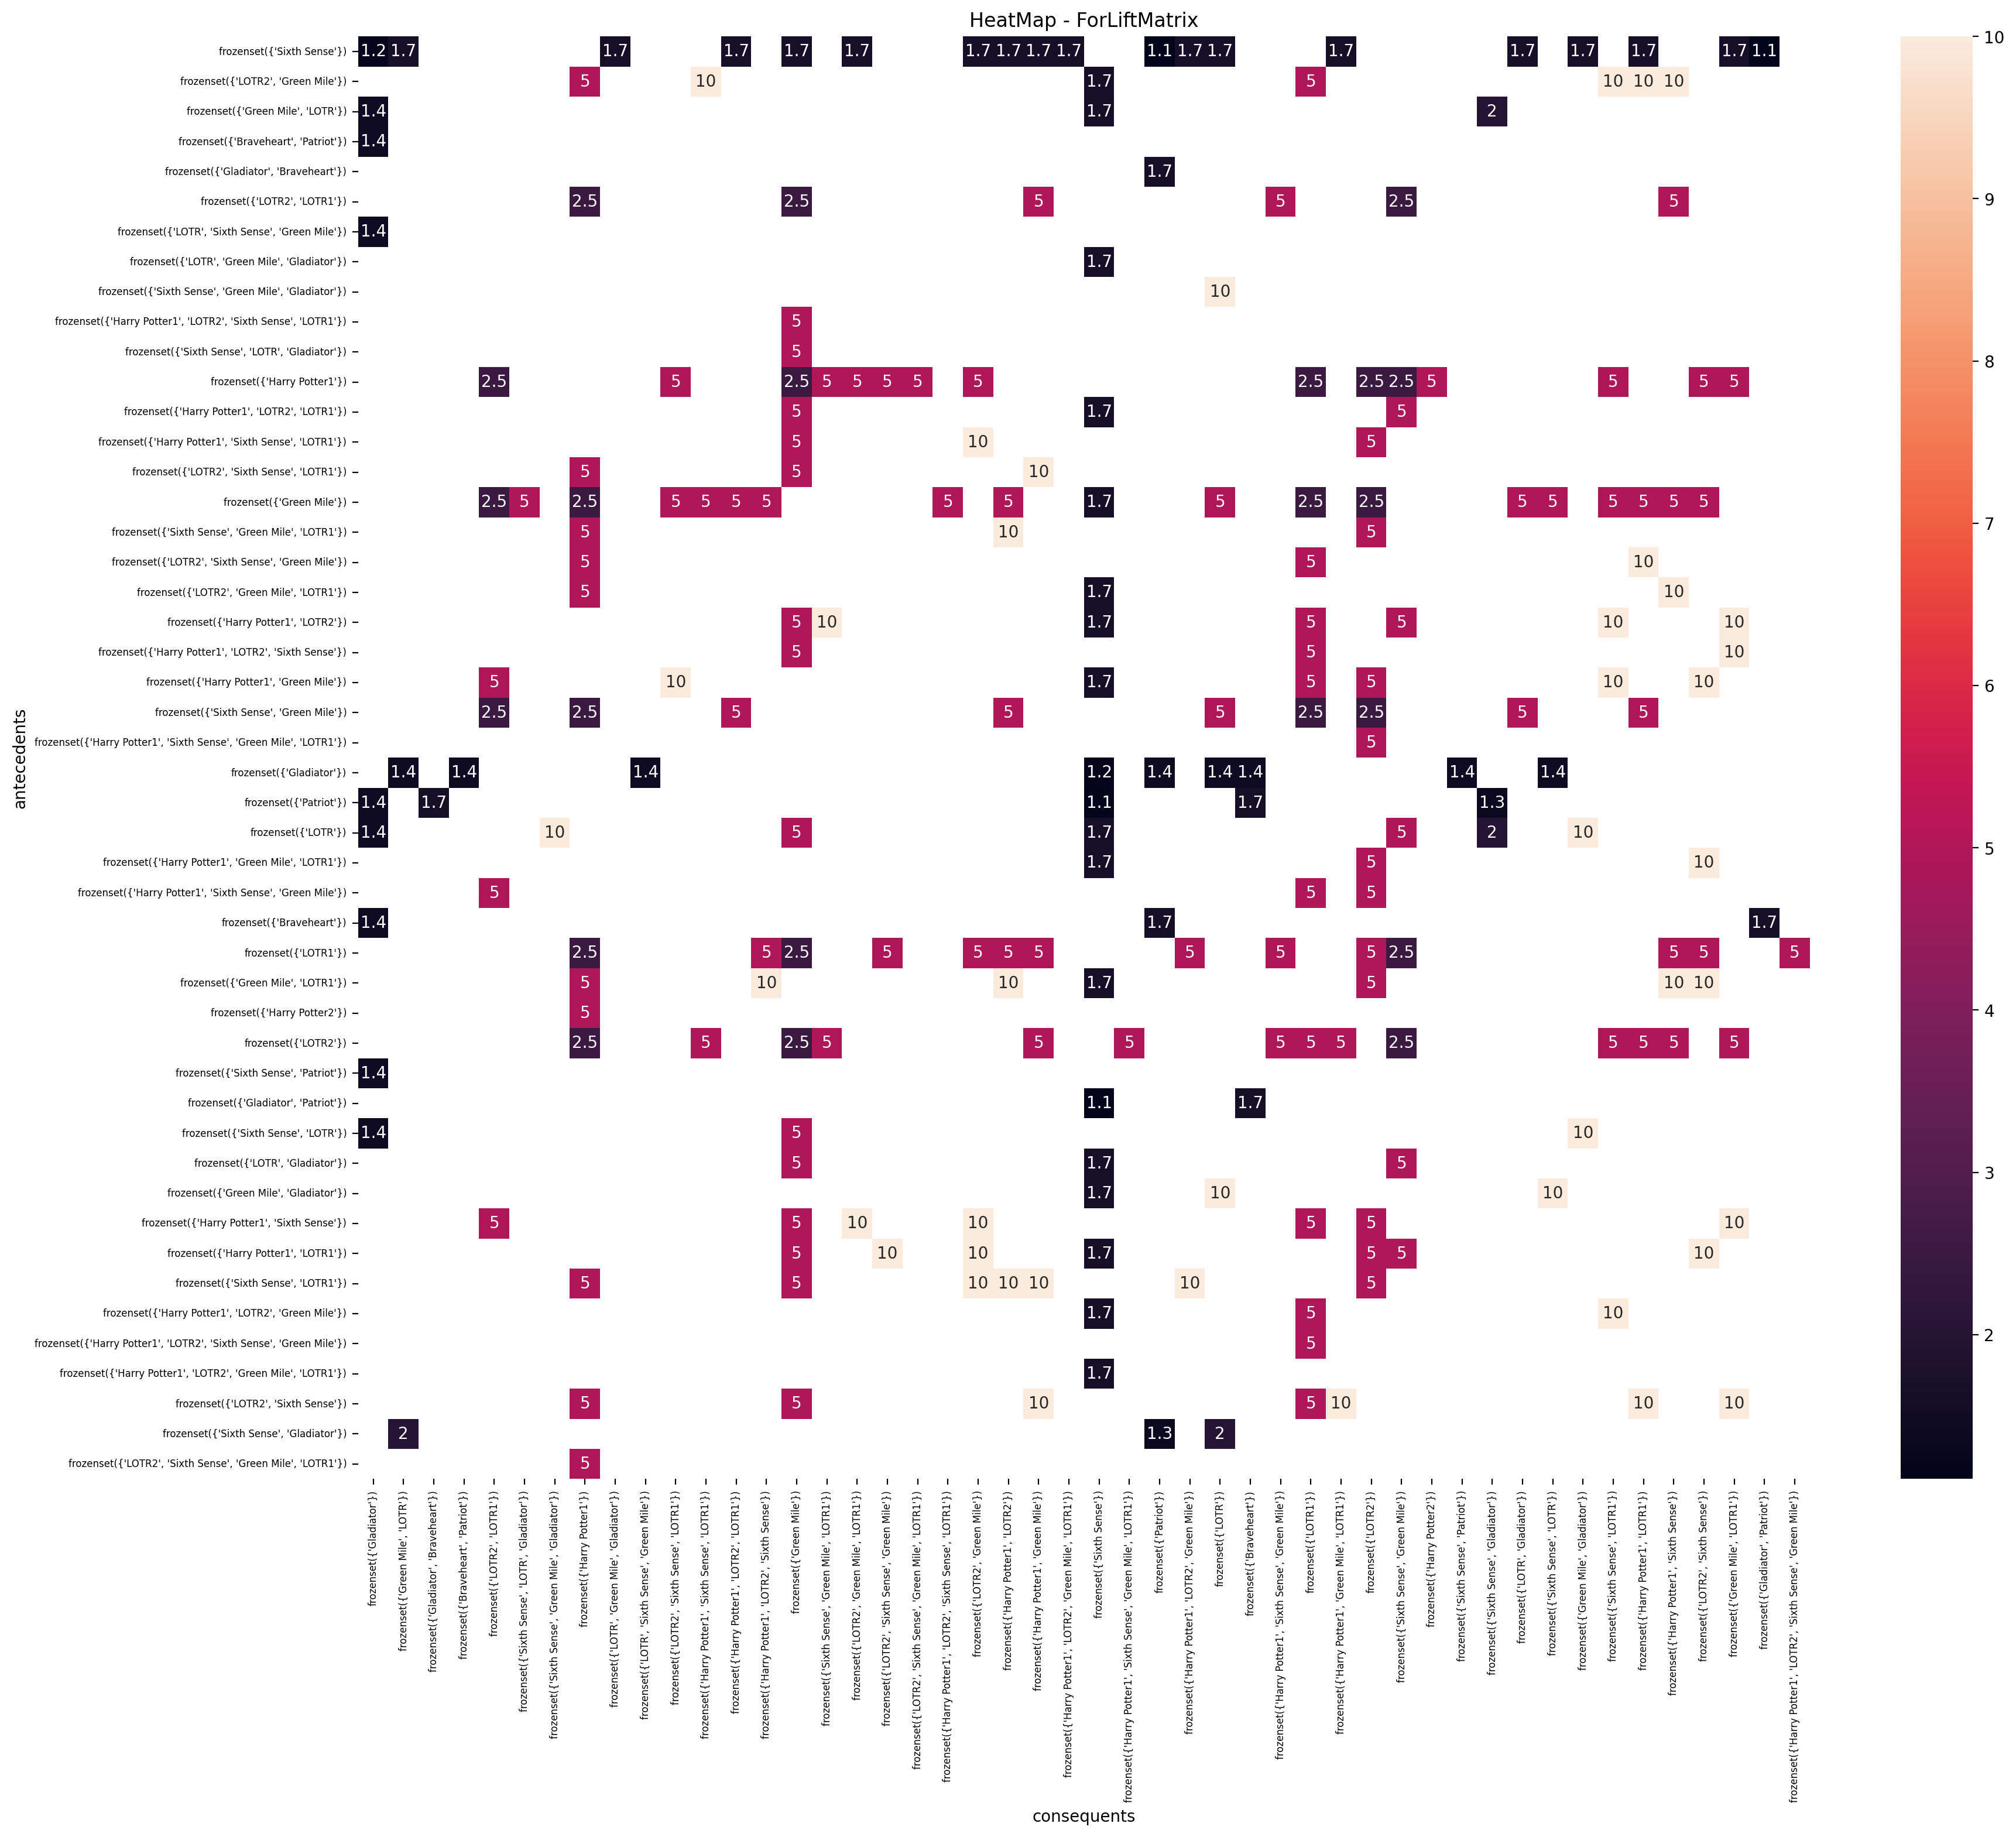

In [49]:
plt.figure(figsize=(20,16), dpi= 200)
sns.heatmap(matrix1, annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

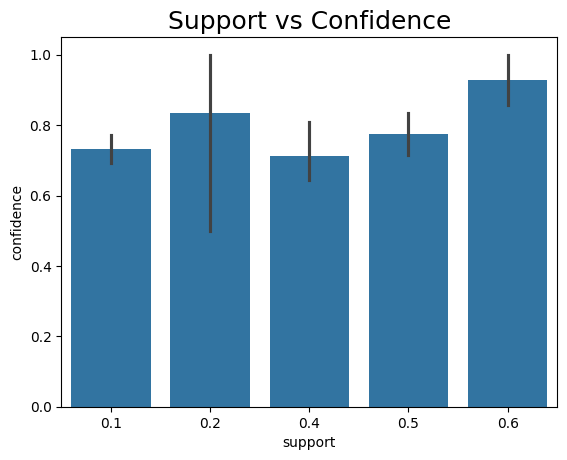

In [23]:
sns.barplot(x="support",y="confidence",data= lift1)
plt.title("Support vs Confidence", fontsize= 18)
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()

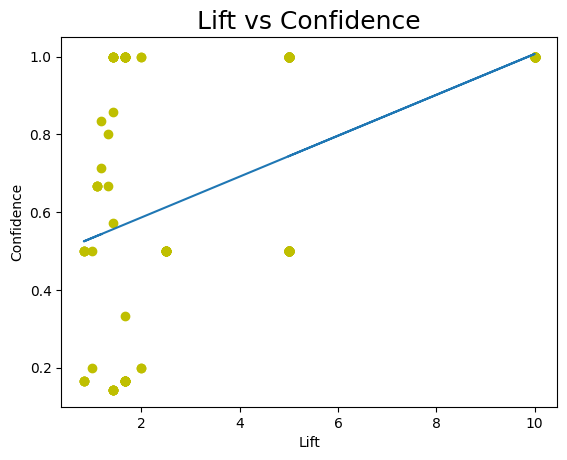

In [24]:
fit = np.polyfit(rules1['lift'], rules1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules1['lift'], rules1['confidence'], 'yo', rules1['lift'],
fit_fn(rules1['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence', fontsize= 18)
plt.show()

### 2. Association rules with 10% Support and 90% confidence

In [25]:
# With 10% Support
frequent_itemsets2=apriori(data_new,min_support=0.1,use_colnames=True)
frequent_itemsets2.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [26]:
print(len(frequent_itemsets2))

53


In [27]:
frequent_itemsets2.sort_values("support", ascending = False).head()

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Gladiator, Patriot)"
10,0.5,"(Sixth Sense, Gladiator)"


In [28]:
# With 90% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.9)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


In [29]:
rules2[(rules2.support > 0.1) & (rules2.confidence > 0.9)].sort_values("confidence", ascending = False).shape

(5, 10)

In [30]:
rules2.sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
131,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
188,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
95,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
130,"(Green Mile, Gladiator)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
203,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


In [31]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift2 = rules2[rules2.lift>1]
lift2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


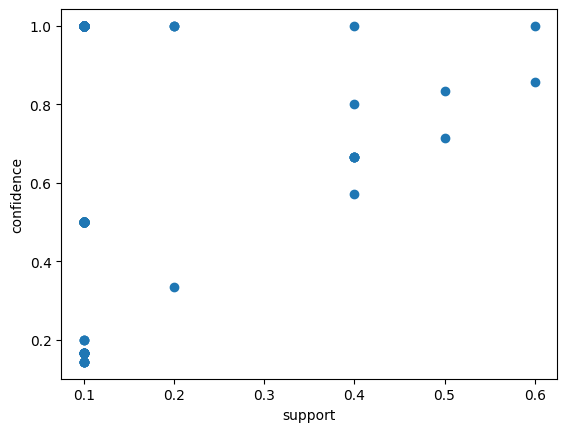

In [32]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [33]:
matrix2 = lift2.pivot('antecedents','consequents','lift')
matrix2.head()

consequents,(Gladiator),"(Green Mile, LOTR)","(Gladiator, Braveheart)","(Braveheart, Patriot)","(LOTR2, LOTR1)","(Sixth Sense, LOTR, Gladiator)","(Sixth Sense, Green Mile, Gladiator)",(Harry Potter1),"(LOTR, Green Mile, Gladiator)","(LOTR, Sixth Sense, Green Mile)",...,"(LOTR, Gladiator)","(Sixth Sense, LOTR)","(Green Mile, Gladiator)","(Sixth Sense, LOTR1)","(Harry Potter1, LOTR1)","(Harry Potter1, Sixth Sense)","(LOTR2, Sixth Sense)","(Green Mile, LOTR1)","(Gladiator, Patriot)","(Harry Potter1, LOTR2, Sixth Sense, Green Mile)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),1.190476,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,...,1.666667,NaN,1.666667,NaN,1.666667,NaN,NaN,1.666667,1.111111,NaN
"(LOTR2, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,10.0,10.000000,10.0,NaN,NaN,NaN,NaN
"(Green Mile, LOTR)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


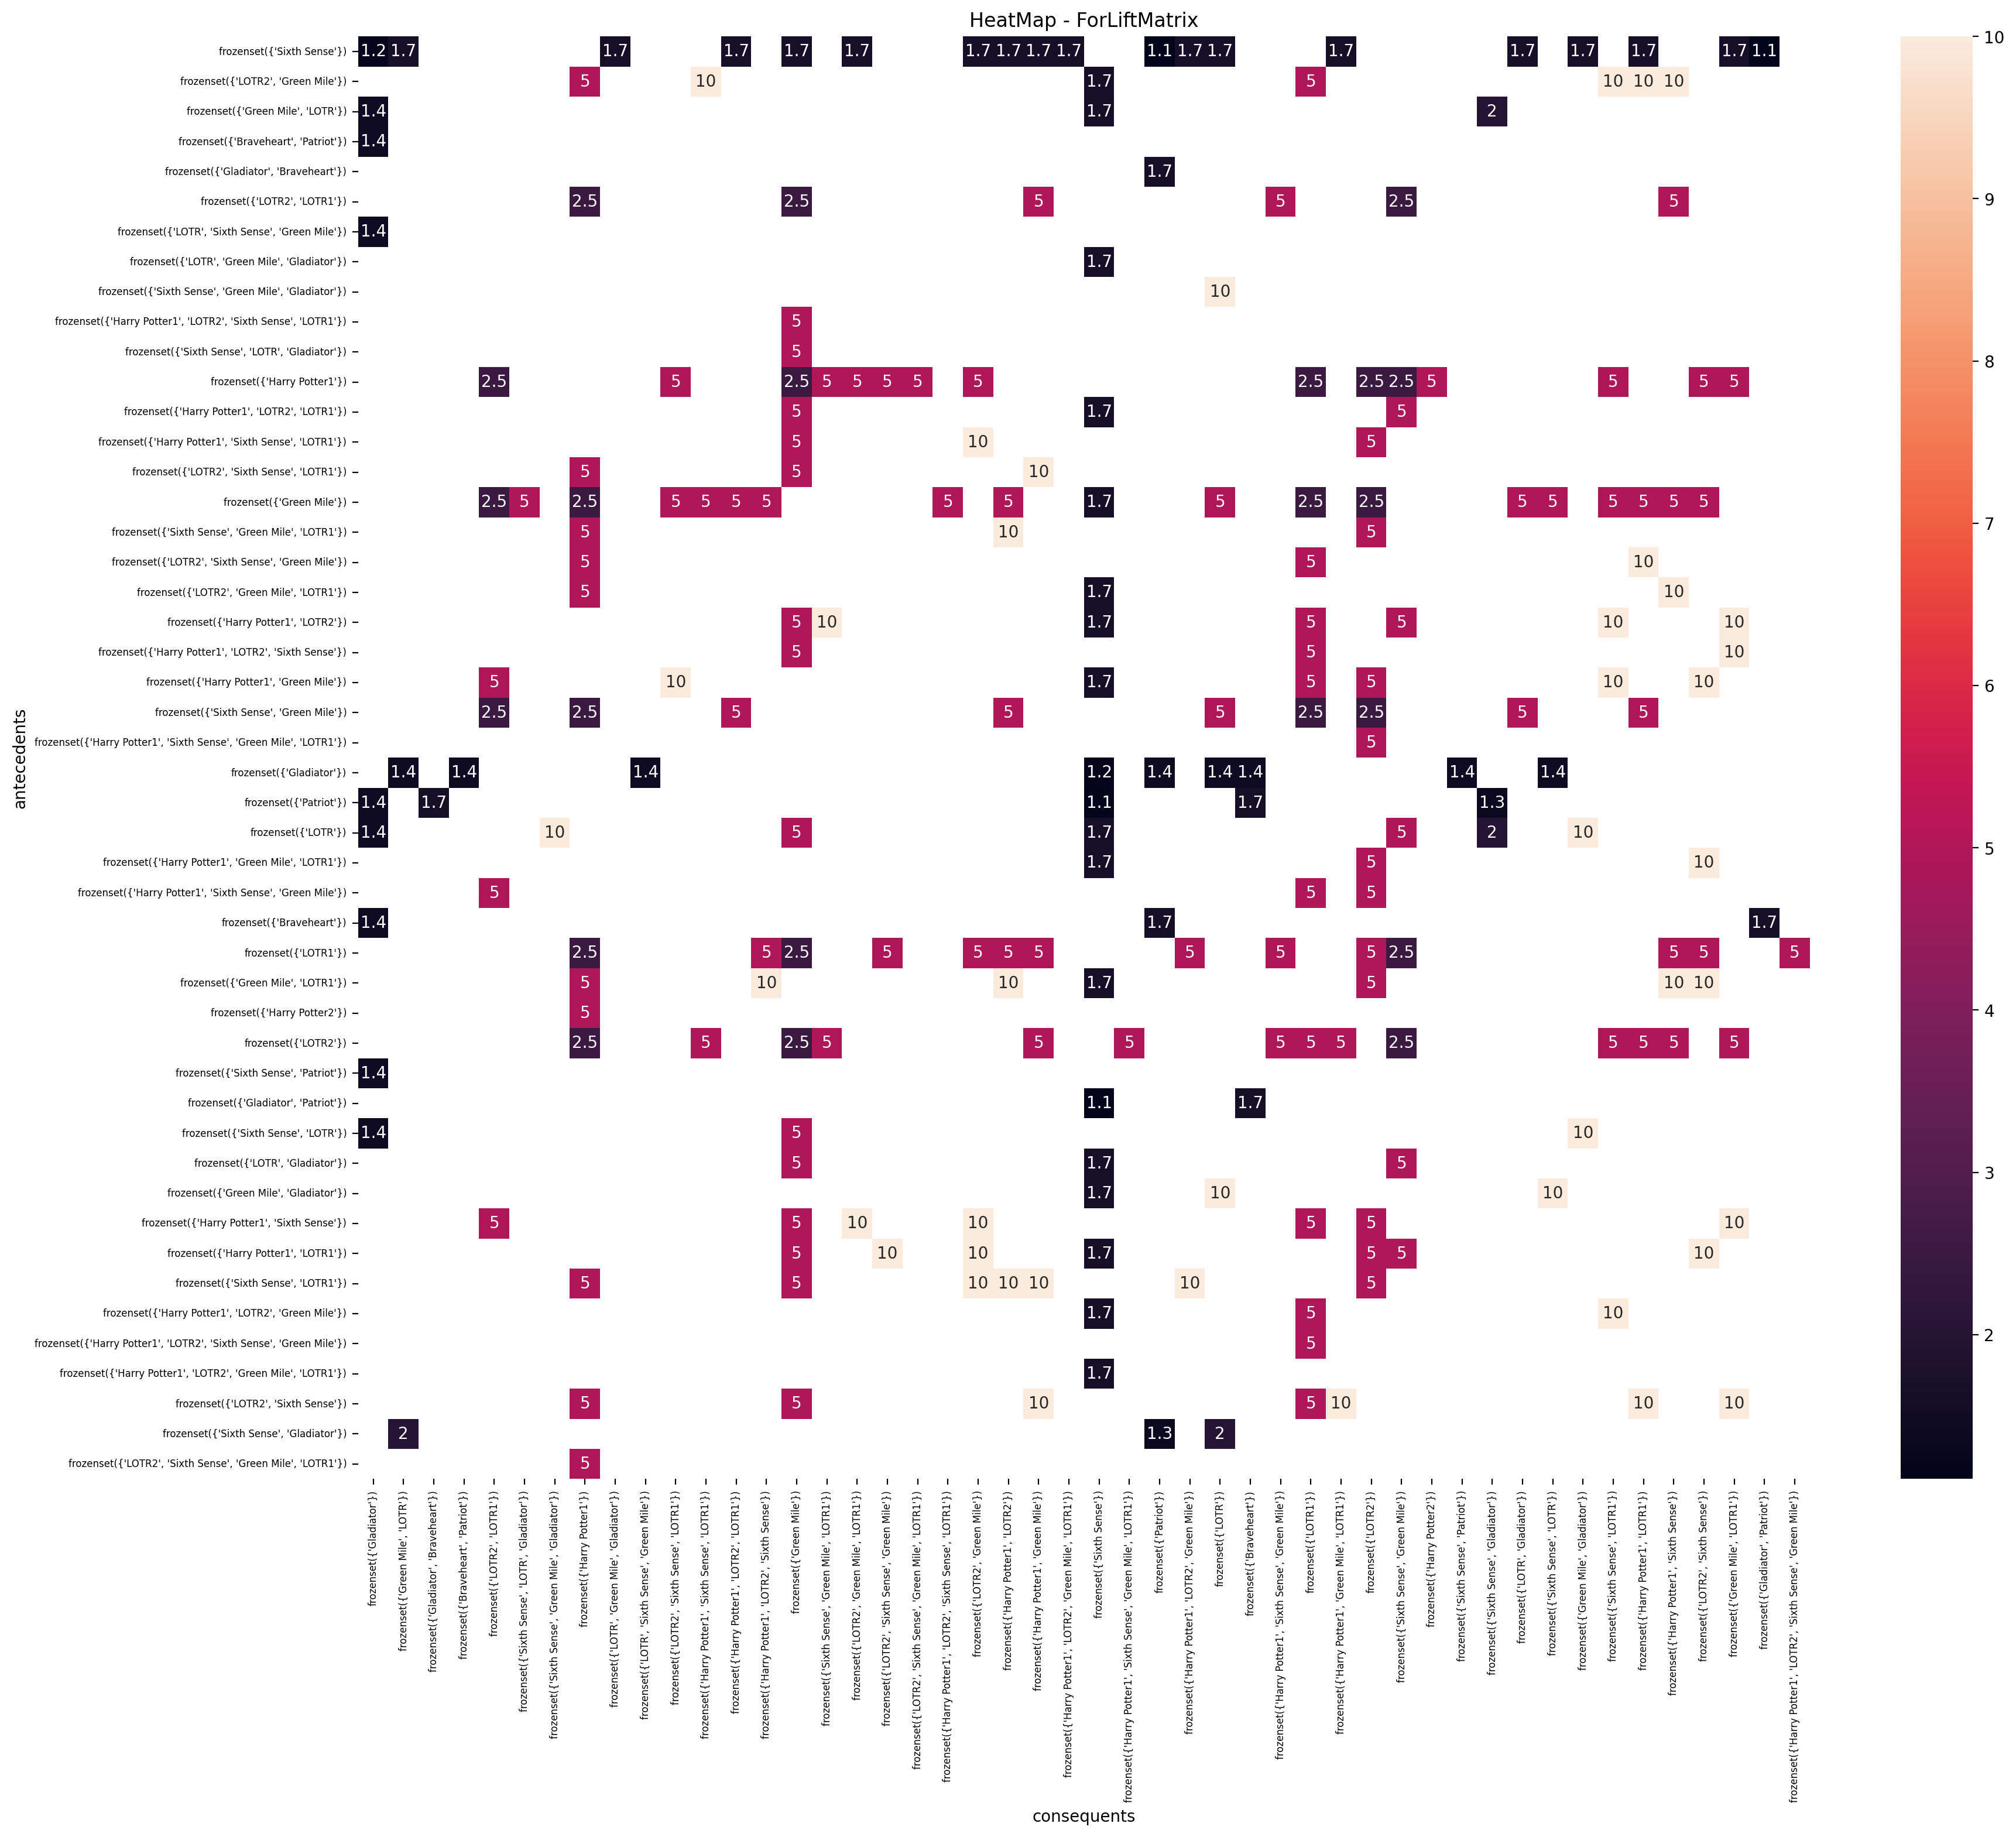

In [34]:
plt.figure(figsize=(20,16), dpi= 200)
sns.heatmap(matrix2, annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

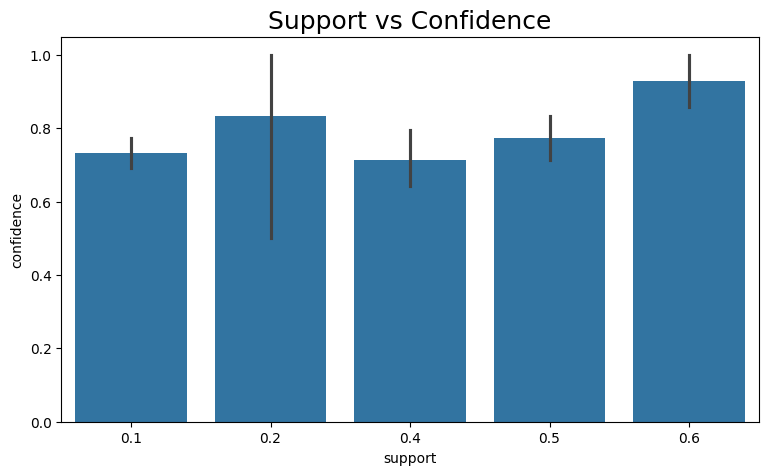

In [35]:
plt.figure(figsize=(9,5), dpi= 100)
sns.barplot(x="support",y="confidence",data= lift2)
plt.title("Support vs Confidence", fontsize= 18)
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()

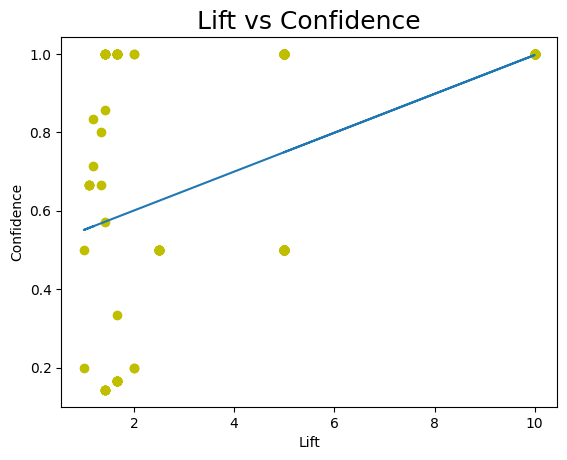

In [36]:
fit = np.polyfit(rules2['lift'], rules2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules2['lift'], rules2['confidence'], 'yo', rules2['lift'],
fit_fn(rules2['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence', fontsize= 18)
plt.show()

### 3. Association rules with 20% Support and 60% confidence

In [37]:
# With 20% Support
frequent_itemsets3=apriori(data_new,min_support=0.2,use_colnames=True)
frequent_itemsets3.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [38]:
print(len(frequent_itemsets3))

13


In [39]:
frequent_itemsets3.sort_values("support", ascending = False).head()

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
10,0.6,"(Gladiator, Patriot)"
7,0.5,"(Sixth Sense, Gladiator)"


In [40]:
# With 70% confidence
rules3=association_rules(frequent_itemsets3,metric='lift',min_threshold=0.6)
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000


In [41]:
rules3[(rules3.support > 0.2) & (rules3.confidence > 0.6)].sort_values("confidence", ascending = False).shape

(11, 10)

In [42]:
rules3.sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.0
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.0
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.0
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.5
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0


In [43]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift3 = rules3[rules3.lift>1]
lift3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000


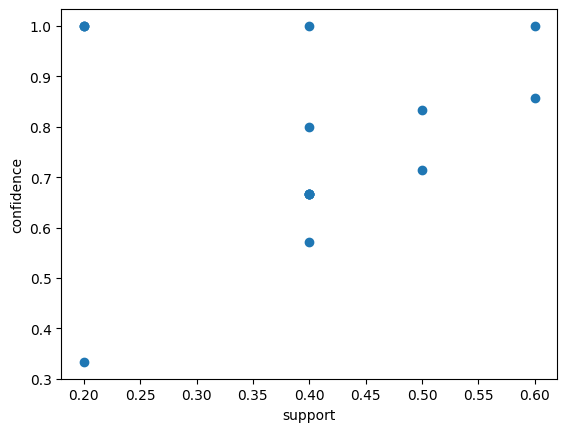

In [44]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [45]:
matrix3 = lift3.pivot('antecedents','consequents','lift')
matrix3.head()

consequents,(Gladiator),(Sixth Sense),(Patriot),(Green Mile),(LOTR1),(LOTR2),"(Gladiator, Patriot)","(Sixth Sense, Patriot)","(Sixth Sense, Gladiator)"
antecedents,,,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,1.666667,NaN,NaN,1.111111,NaN,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,NaN,1.428571,NaN
(Patriot),1.428571,1.111111,NaN,NaN,NaN,NaN,NaN,NaN,1.333333
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


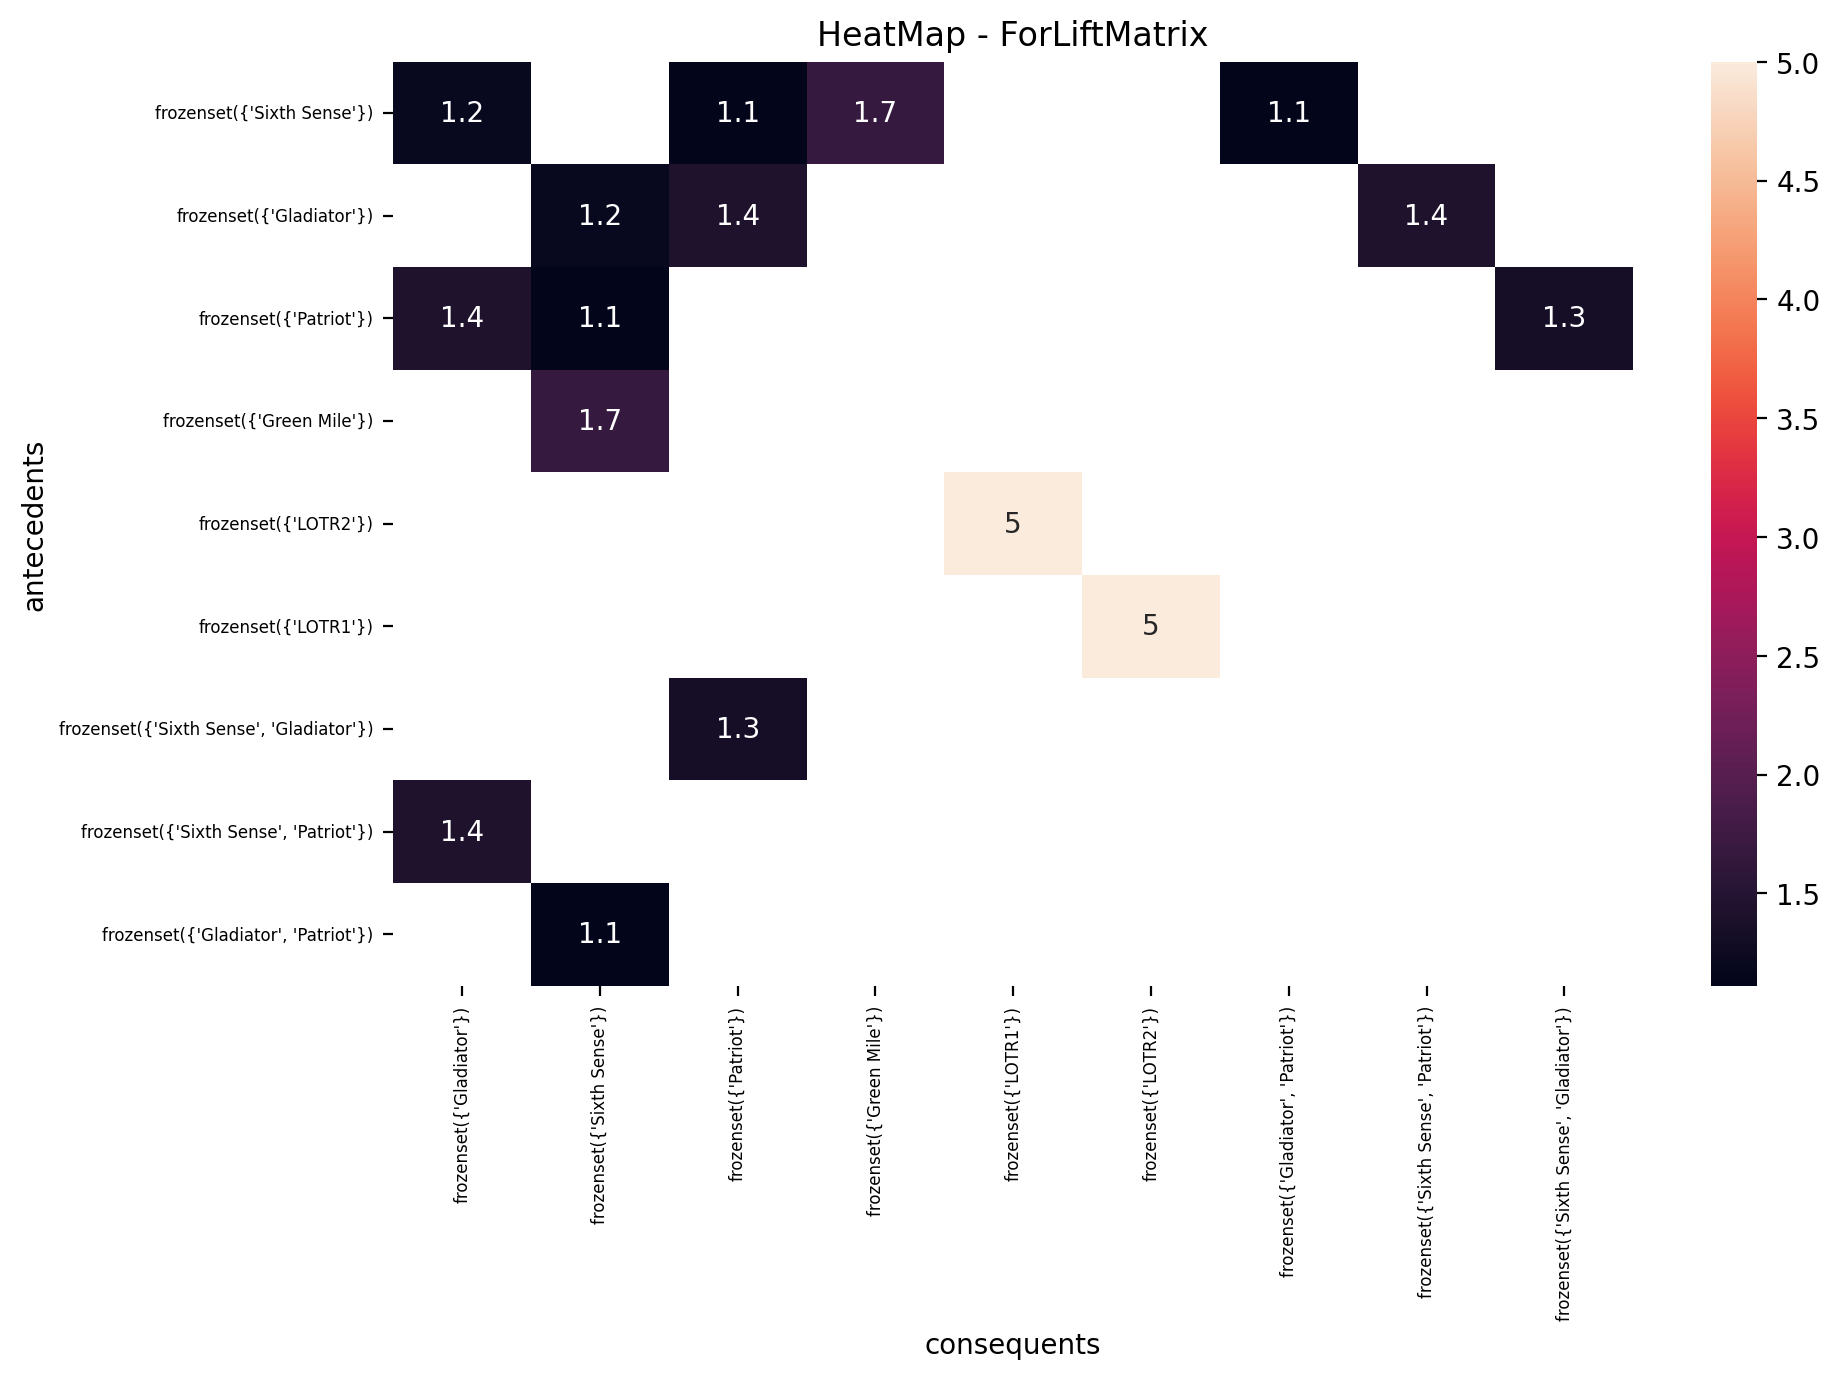

In [46]:
plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(matrix3, annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

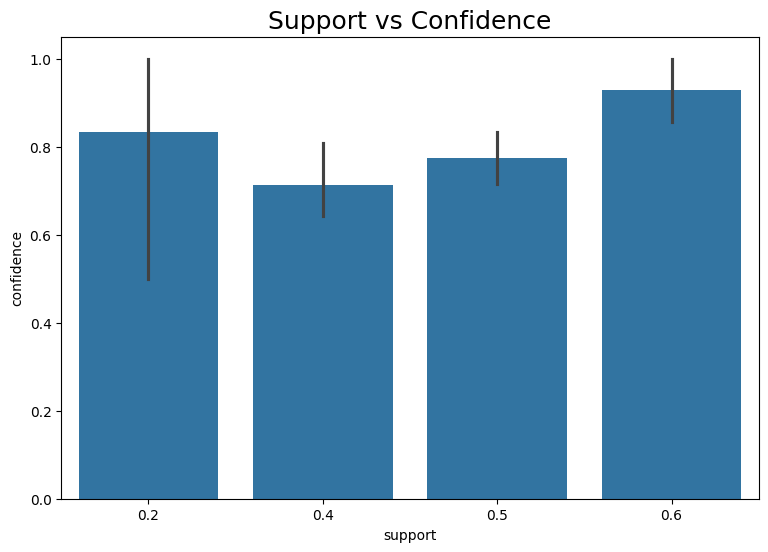

In [47]:
plt.figure(figsize=(9,6))
sns.barplot(x="support",y="confidence", data=lift3)
plt.title("Support vs Confidence", fontsize= 18)
plt.show()

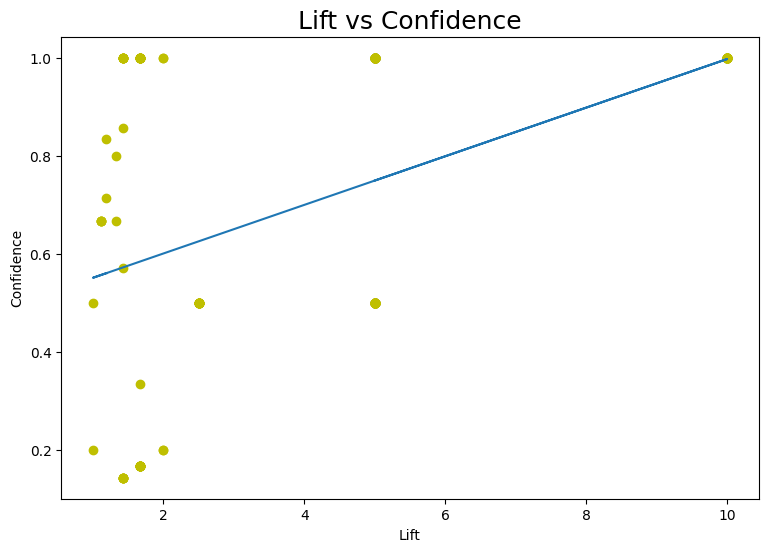

In [48]:
plt.figure(figsize=(9,6))
fit = np.polyfit(rules2['lift'], rules2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules2['lift'], rules2['confidence'], 'yo', rules2['lift'],
fit_fn(rules2['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence', fontsize= 18)
plt.show()